<a href="https://colab.research.google.com/github/Viiiin94/ondevice_ai_python/blob/main/colab/AI_exam04_heart_disease_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd                     ##자료형을 효율적으로 활용하기 위한 클래스(ex:read.excel 함수를 활용)
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
column_names = ['age','sex', 'cp','treshbps','chol','fbs','restecg','thalach',
                'exang','oldpeak','slope','ca','thal','hearDisease']
raw_data = pd.read_excel('./heart-disease.xlsx', names=column_names)
print(raw_data.head())    ## 앞의 5개까지의 데이터만 출력해주는 옵션

   age  sex  cp  treshbps chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   67    1   4       160  286    0        0      108      1      1.5      2   
1   67    1   4       120    ?    0        2      129      1      2.6      2   
2   37    1   3       130  250    0        0      187      0      3.5      3   
3   41    0   2       130  204    0        2      172      0      1.4      1   
4   56    1   2       120  236    0        0      178      0      0.8      1   

  ca thal  hearDisease  
0  3    3            1  
1  2    7            1  
2  0    3            0  
3  0    3            0  
4  0    3            0  


In [ ]:
raw_data.head()

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hearDisease
0,67,1,4,160,286,0,0,108,1,1.5,2,3,3,1
1,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [ ]:
raw_data.tail()

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hearDisease
297,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
298,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
299,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
300,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
301,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [ ]:
raw_data.describe()

,age,sex,cp,treshbps,fbs,restecg,thalach,exang,oldpeak,slope,hearDisease
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,0.145695,0.980132,149.605960,0.327815,1.035430,1.596026,0.460265
std,9.040163,0.467709,0.953612,17.612202,0.353386,0.994805,22.912959,0.470196,1.160723,0.611939,0.499246
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
clean_data = raw_data.replace('?', np.nan)
## ? data는 인식을 못하므로 문자열 교체(? => np.nan(숫자인 nan 으로 바꿈, 결과값은 nan으로 됨))
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          302 non-null    int64  
 1   sex          302 non-null    int64  
 2   cp           302 non-null    int64  
 3   treshbps     302 non-null    int64  
 4   chol         301 non-null    float64
 5   fbs          302 non-null    int64  
 6   restecg      302 non-null    int64  
 7   thalach      302 non-null    int64  
 8   exang        302 non-null    int64  
 9   oldpeak      302 non-null    float64
 10  slope        302 non-null    int64  
 11  ca           298 non-null    float64
 12  thal         300 non-null    float64
 13  hearDisease  302 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.2 KB


/tmp/ipython-input-4069997173.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data = raw_data.replace('?', np.nan)


In [ ]:
clean_data = clean_data.dropna()    ## 전체 통계량에 영향을 주지않는 무의미한 표본갯수라 그냥 지웠음.(이 예제에선는...)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 300
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          295 non-null    int64  
 1   sex          295 non-null    int64  
 2   cp           295 non-null    int64  
 3   treshbps     295 non-null    int64  
 4   chol         295 non-null    float64
 5   fbs          295 non-null    int64  
 6   restecg      295 non-null    int64  
 7   thalach      295 non-null    int64  
 8   exang        295 non-null    int64  
 9   oldpeak      295 non-null    float64
 10  slope        295 non-null    int64  
 11  ca           295 non-null    float64
 12  thal         295 non-null    float64
 13  hearDisease  295 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.6 KB


In [ ]:
keep = column_names.pop()
print(keep)
print(column_names)

hearDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
training_data = clean_data[column_names]
target_data = clean_data[[keep]]
print(training_data.head())
print(target_data.head())

   age  sex  cp  treshbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   67    1   4       160  286.0    0        0      108      1      1.5   
2   37    1   3       130  250.0    0        0      187      0      3.5   
3   41    0   2       130  204.0    0        2      172      0      1.4   
4   56    1   2       120  236.0    0        0      178      0      0.8   
5   62    0   4       140  268.0    0        2      160      0      3.6   

   slope   ca  thal  
0      2  3.0   3.0  
2      3  0.0   3.0  
3      1  0.0   3.0  
4      1  0.0   3.0  
5      3  2.0   3.0  
   hearDisease
0            1
2            0
3            0
4            0
5            1


In [ ]:
print(target_data.sum())

hearDisease    136
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
acaler = StandardScaler()
scaled_data = acaler.fit_transform(training_data)
scaled_data = pd.DataFrame(scaled_data, columns=training_data.columns)
scaled_data.head()

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.388651,0.694559,0.874886,1.593870,0.740168,-0.407441,-0.989928,-1.815671,1.439763,0.390505,0.657629,2.482934,-0.887746
1,-1.936447,0.694559,-0.170018,-0.095037,0.048763,-0.407441,-0.989928,1.626748,-0.694559,2.111176,2.287886,-0.720268,-0.887746
2,-1.493101,-1.439763,-1.214923,-0.095037,-0.834700,-0.407441,1.024064,0.973124,-0.694559,0.304471,-0.972628,-0.720268,-0.887746
3,0.169449,0.694559,-1.214923,-0.658006,-0.220117,-0.407441,-0.989928,1.234573,-0.694559,-0.211730,-0.972628,-0.720268,-0.887746
4,0.834468,-1.439763,0.874886,0.467932,0.394466,-0.407441,1.024064,0.450225,-0.694559,2.197210,2.287886,1.415200,-0.887746


In [ ]:
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,295.0,-2.529050e-16,1.001699,-2.823140,-0.717244,0.169449,0.723632,2.497017
sex,295.0,-7.225858e-17,1.001699,-1.439763,-1.439763,0.694559,0.694559,0.694559
cp,295.0,-6.021549e-17,1.001699,-2.259827,-0.170018,-0.170018,0.874886,0.874886
treshbps,295.0,-7.195751e-16,1.001699,-2.121725,-0.658006,-0.095037,0.467932,3.845746
chol,295.0,9.935555e-17,1.001699,-2.332745,-0.700260,-0.085677,0.557714,6.079355
fbs,295.0,4.817239e-17,1.001699,-0.407441,-0.407441,-0.407441,-0.407441,2.454345
restecg,295.0,-4.817239e-17,1.001699,-0.989928,-0.989928,-0.989928,1.024064,1.024064
thalach,295.0,8.430168e-17,1.001699,-3.427943,-0.704510,0.145200,0.711674,2.280372
exang,295.0,7.301128e-17,1.001699,-0.694559,-0.694559,-0.694559,1.439763,1.439763
oldpeak,295.0,-1.204310e-16,1.001699,-0.899999,-0.899999,-0.211730,0.476539,4.434083


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target_data, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(236, 13)
(59, 13)
(236, 1)
(59, 1)


In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=13))
model.add(Dropout(0.1)) #dense 사이에 dropout을 추가
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,521 (670.00 KB)

 Trainable params: 171,521 (670.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
fit_hist = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose = 1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - binary_accuracy: 1.0000 - loss: 1.8251e-04 - val_binary_accuracy: 0.8333 - val_loss: 2.2356
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - binary_accuracy: 0.9928 - loss: 0.0260 - val_binary_accuracy: 0.8125 - val_loss: 2.1013
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - binary_accuracy: 1.0000 - loss: 2.2210e-04 - val_binary_accuracy: 0.8542 - val_loss: 1.9601
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - binary_accuracy: 1.0000 - loss: 5.4381e-04 - val_binary_accuracy: 0.8542 - val_loss: 1.9825
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - binary_accuracy: 1.0000 - loss: 0.0019 - val_binary_accuracy: 0.7917 - val_loss: 2.1566
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - binary_accuracy: 0.9976 - loss: 0.0023 - val_binary_accuracy: 0.7917 - val_loss: 2.3037
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - binary_accuracy: 1.0000 - loss: 3.6824e-04 - val_binary_accuracy: 0.8125 - val_loss: 2.5849
Epoc

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss',score[0])
print('binary_accuracy',score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - binary_accuracy: 0.6924 - loss: 4.9860
loss 5.2721333503723145
binary_accuracy 0.694915235042572


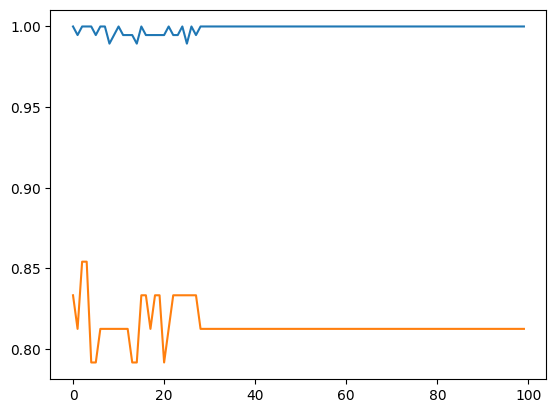

In [ ]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss', score[0])
print('accuracy', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - binary_accuracy: 0.6924 - loss: 4.9860
loss 5.2721333503723145
accuracy 0.694915235042572


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

pred = model.predict(X_test)
# 심장병일 경우 반반 0.5보단 보수적인 0.1로 하는 경우가 있다고 함
pred = pred > 0.5

print(confusion_matrix(y_test, pred))
print(f1_score(y_test, pred))
print(recall_score(y_test, pred))
print(precision_score(y_test, pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[22  8]
 [10 19]]
0.6785714285714286
0.6551724137931034
0.7037037037037037


In [ ]:
a = [1, 4, 1, 2, 4, 2, 4, 2, 3, 4, 4]
s = set(a)
print(len(s))
print(len(a))

4
11
